# Problem 2.5

## Part a.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gen_random_walk(N, d):
    steps = np.random.uniform(-.5, .5, size=(N, d))
    return np.cumsum(steps, axis=0)

Plot $x_t$ vs. $t$ for a few 10,000 step random walks.

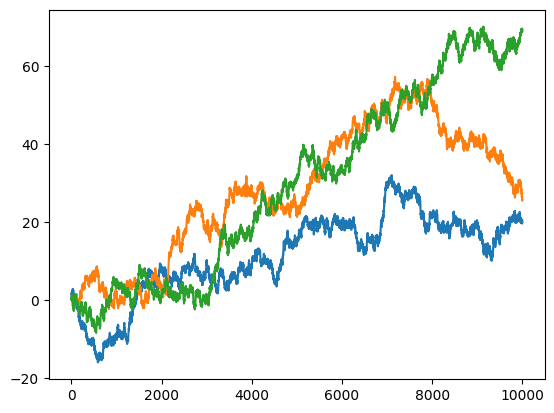

In [3]:
for _ in range(3):
    walk = gen_random_walk(10_000, d=1)
    plt.plot(walk[:, 0])

Plot $x$ vs. $y$ for a few two-dimensional random walks with $N = 10, 1000,$ and $10,000$.

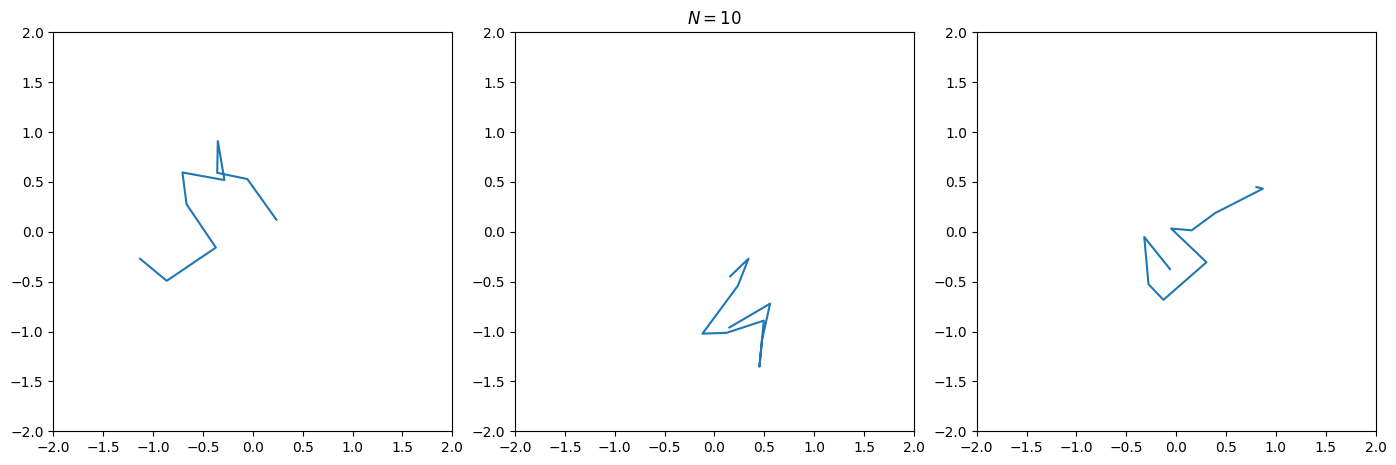

In [4]:
plot_lim = 2

plt.figure(figsize=(14, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    walk = gen_random_walk(10, 2)

    plt.plot(walk[:, 0], walk[:, 1])
    plt.gca().set_aspect('equal')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])

    if i == 1:
        plt.title('$N = 10$')

plt.tight_layout();

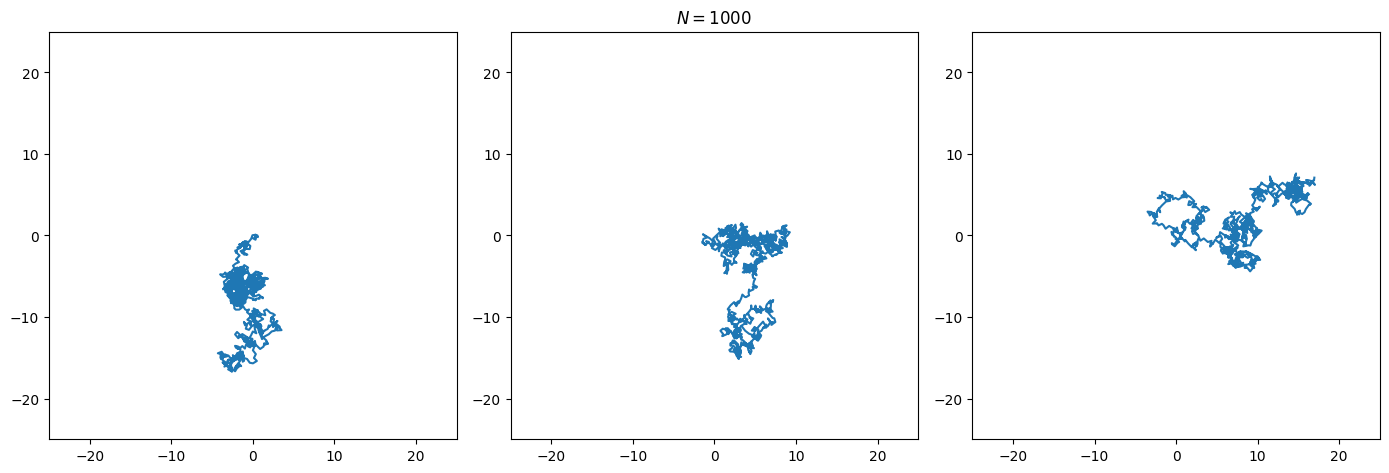

In [5]:
plot_lim = 25

plt.figure(figsize=(14, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    walk = gen_random_walk(1000, 2)

    plt.plot(walk[:, 0], walk[:, 1])
    plt.gca().set_aspect('equal')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])

    if i == 1:
        plt.title('$N = 1000$')

plt.tight_layout();

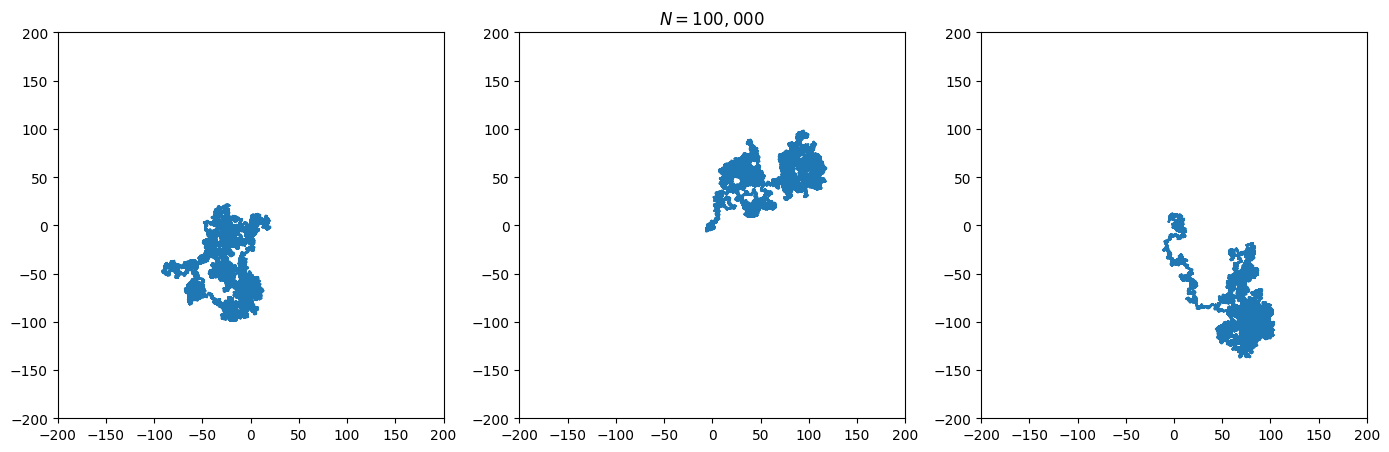

In [6]:
plot_lim = 200

plt.figure(figsize=(14, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    walk = gen_random_walk(100_000, 2)

    plt.plot(walk[:, 0], walk[:, 1])
    plt.gca().set_aspect('equal')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])

    if i == 1:
        plt.title('$N = 100,000$')

plt.tight_layout();

Increasing the number of steps by a factor of 100 increases the distance by about a factor of 10 as expected.

## Part b.

In [7]:
def find_rw_endpoint(N, d):
    return gen_random_walk(N, d)[-1]

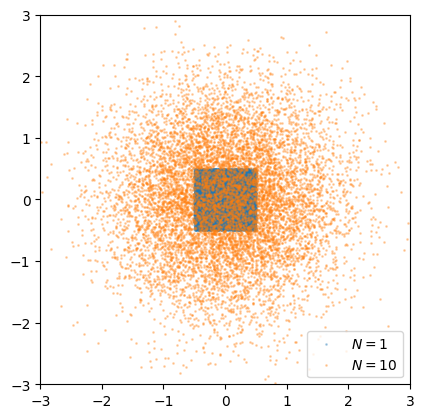

In [8]:
endpoints = np.stack([find_rw_endpoint(N=1, d=2) for _ in range(10_000)])
plt.scatter(endpoints[:, 0], endpoints[:, 1], label='$N = 1$', s=1, alpha=0.3)

endpoints = np.stack([find_rw_endpoint(N=10, d=2) for _ in range(10_000)])
plt.scatter(endpoints[:, 0], endpoints[:, 1], label='$N = 10$', s=1, alpha=0.3)

plot_lim = 3
plt.xlim([-plot_lim, plot_lim])
plt.ylim([-plot_lim, plot_lim])
plt.gca().set_aspect('equal')
plt.legend();

## Part c.

The RMS step size is given by

$$
\begin{eqnarray}
a_{\textrm{RMS}} & = & \sqrt{\left< x^2 \right>} \\
& = & \left[ \int_{-\frac{1}{2}}^{\frac{1}{2}} x^2 p(x) \, dx \right]^{\frac{1}{2}} \\
& = & \left[ \int_{-\frac{1}{2}}^{\frac{1}{2}} x^2 \, dx \right]^{\frac{1}{2}} \\
& = & \left[ \frac{x^3}{3} \bigg|_{-\frac{1}{2}}^{\frac{1}{2}}  \right]^{\frac{1}{2}} \\
& = & \frac{1}{2 \sqrt{3}}
\end{eqnarray}
$$

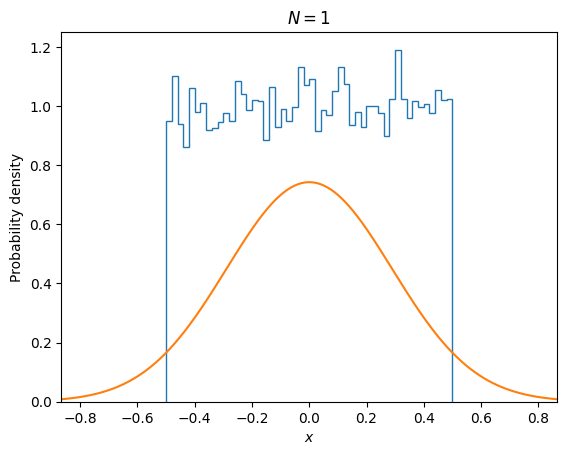

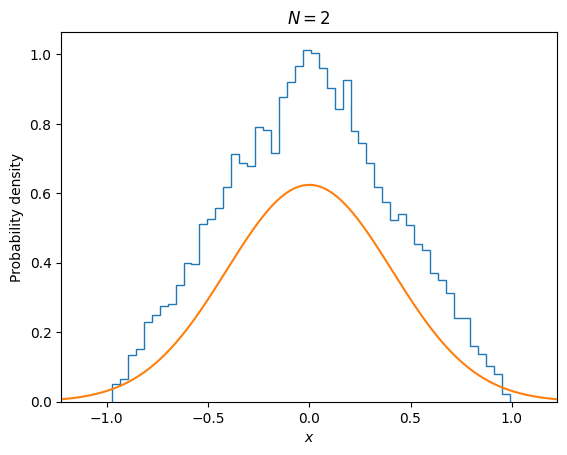

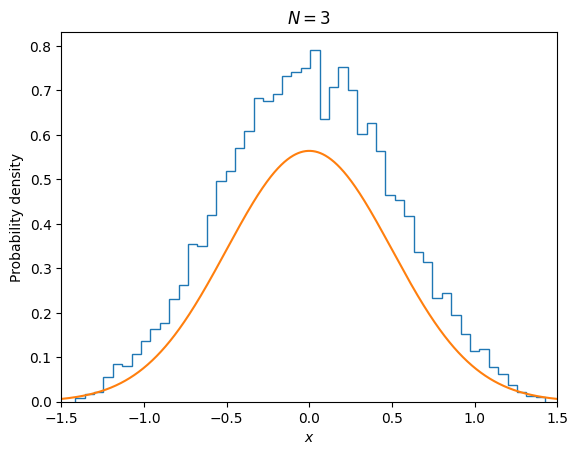

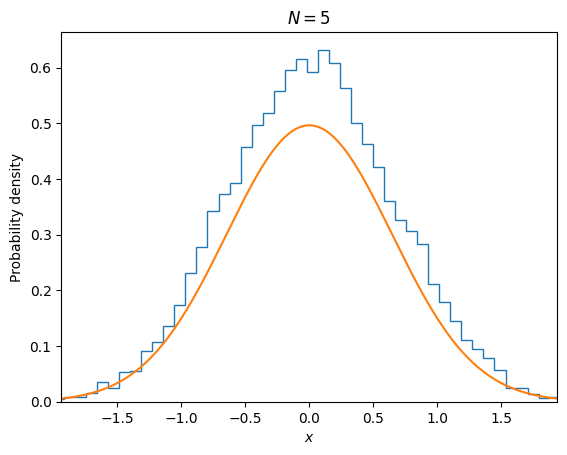

In [9]:
for N in [1, 2, 3, 5]:
    endpoints = np.stack([find_rw_endpoint(N=N, d=1) for _ in range(10_000)])

    plt.hist(endpoints, bins=50, density=True, histtype='step')

    a = 1 / (2 * np.sqrt(3))
    sigma = np.sqrt(N) * a
    X = np.linspace(-3 * sigma, 3 * sigma, num=1000)
    Y = np.exp(-X**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma)
    plt.plot(X, Y)
    plt.xlim([-3 * sigma, 3 * sigma])
    plt.xlabel('$x$')
    plt.ylabel('Probability density')
    plt.title(f'$N = {N}$')
    plt.show();